In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv("vag_dataset.csv")

In [152]:
#structure of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   knee_condition      2500 non-null   object 
 1   severity_level      1705 non-null   object 
 2   treatment_advised   2500 non-null   object 
 3   rms_amplitude       2500 non-null   float64
 4   peak_frequency      2500 non-null   float64
 5   spectral_entropy    2500 non-null   float64
 6   zero_crossing_rate  2500 non-null   float64
 7   mean_frequency      2500 non-null   float64
dtypes: float64(5), object(3)
memory usage: 156.4+ KB


In [153]:
#first few rows
df.head()

,knee_condition,severity_level,treatment_advised,rms_amplitude,peak_frequency,spectral_entropy,zero_crossing_rate,mean_frequency
0,normal,NaN,No Treatment,1.051421,20.0,-1799.219746,0.001,39.864485
1,normal,NaN,No Treatment,1.071817,20.0,-2010.827330,0.000,40.652874
2,osteoarthritis,Mild,Physiotherapy,1.098748,20.0,-2172.177329,0.000,39.961072
3,osteoarthritis,Severe,Surgery,1.063046,20.0,-1915.991388,0.000,39.860160
4,ligament_injury,Severe,Surgery,1.222318,20.0,-3331.987202,0.001,44.747680


In [154]:
#duplicate row check
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [155]:
df = df.drop_duplicates()

In [156]:
#check for missing value
df.isnull().sum()

knee_condition          0
severity_level        795
treatment_advised       0
rms_amplitude           0
peak_frequency          0
spectral_entropy        0
zero_crossing_rate      0
mean_frequency          0
dtype: int64

In [157]:
#basic status of numerical values
df.describe()

,rms_amplitude,peak_frequency,spectral_entropy,zero_crossing_rate,mean_frequency
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1.118481,20.384000,-2412.251714,-0.000018,41.949641
std,0.067338,4.785573,610.620891,0.000717,2.453461
min,1.003640,20.000000,-3915.364528,-0.001000,37.910850
25%,1.065577,20.000000,-3094.827471,-0.001000,40.038446
50%,1.086830,20.000000,-2112.249370,0.000000,40.729064
75%,1.195361,20.000000,-1930.338196,0.000000,44.743906
max,1.264899,80.000000,-1453.671345,0.001000,47.607962


In [158]:
#check min and max feature
for column in ['rms_amplitude', 'peak_frequency', 'spectral_entropy', 'zero_crossing_rate']:
    print(f"{column}: min = {df[column].min()}, max = {df[column].max()}")


rms_amplitude: min = 1.0036403934841054, max = 1.264898646730383
peak_frequency: min = 20.0, max = 80.0
spectral_entropy: min = -3915.3645278958447, max = -1453.6713448879295
zero_crossing_rate: min = -0.001, max = 0.001


In [159]:
#Check Unique Values in Categorical Column
print(df['knee_condition'].unique())
print(df['severity_level'].unique())
print(df['treatment_advised'].unique())

['normal' 'osteoarthritis' 'ligament_injury']
[nan 'Mild' 'Severe' 'Moderate']
['No Treatment' 'Physiotherapy' 'Surgery']


In [160]:
print(df['knee_condition'].value_counts())
print(df['severity_level'].value_counts())
print(df['treatment_advised'].value_counts())

knee_condition
ligament_injury    871
osteoarthritis     834
normal             795
Name: count, dtype: int64
severity_level
Severe      721
Moderate    713
Mild        271
Name: count, dtype: int64
treatment_advised
Surgery          1296
No Treatment      795
Physiotherapy     409
Name: count, dtype: int64


In [161]:
nan_severity_rows = df[df['severity_level'].isna()][['knee_condition', 'severity_level']]
print(nan_severity_rows)

     knee_condition severity_level
0            normal            NaN
1            normal            NaN
6            normal            NaN
9            normal            NaN
12           normal            NaN
...             ...            ...
2486         normal            NaN
2492         normal            NaN
2494         normal            NaN
2496         normal            NaN
2498         normal            NaN

[795 rows x 2 columns]


In [162]:
filtered_rows = df[df['severity_level'].isna() & (df['knee_condition'] != 'normal')]
print(filtered_rows[['knee_condition', 'severity_level']])

Empty DataFrame
Columns: [knee_condition, severity_level]
Index: []


In [163]:
#Fill with "Unknown"
df['severity_level'] = df['severity_level'].fillna('None')

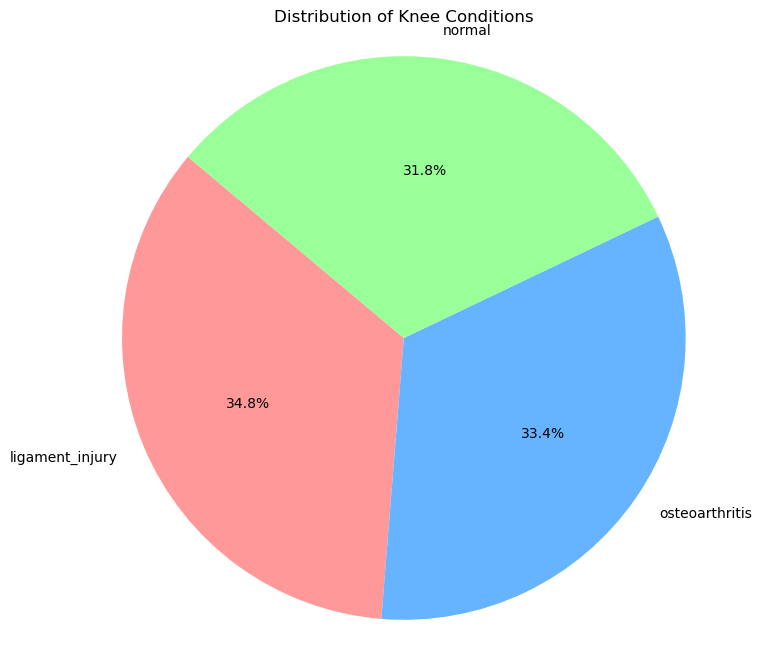

In [164]:
import matplotlib.pyplot as plt

# Count the occurrences of each knee condition
condition_counts = df['knee_condition'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Knee Conditions')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

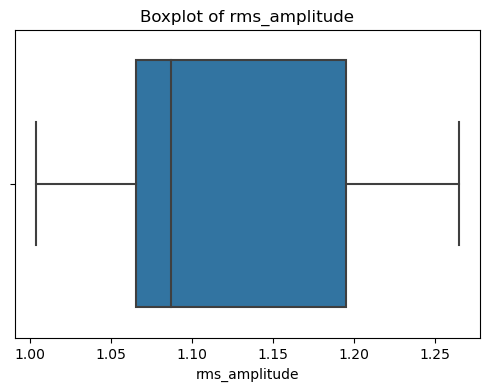

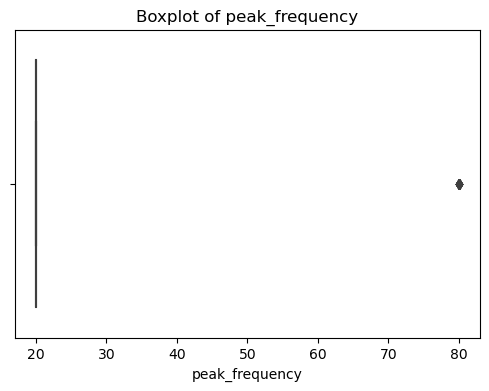

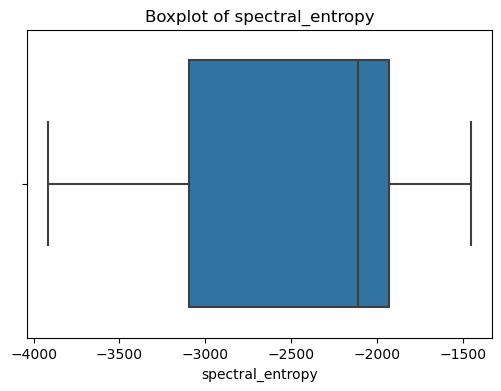

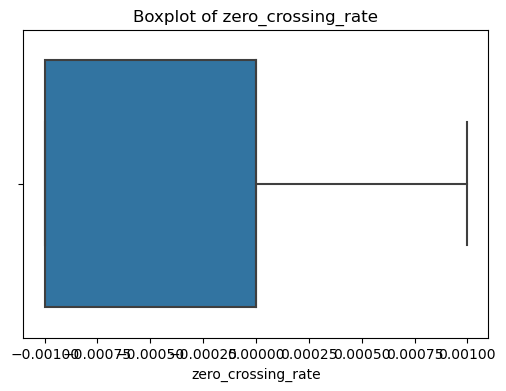

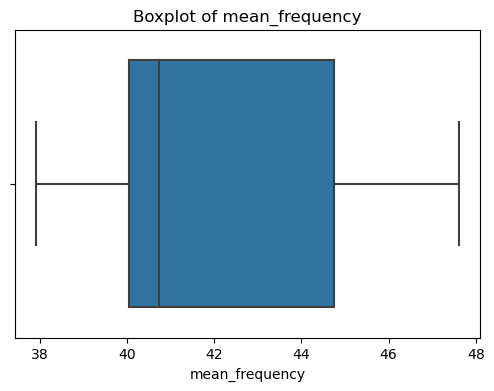

In [165]:
numeric_features = ['rms_amplitude', 'peak_frequency', 'spectral_entropy', 'zero_crossing_rate', 'mean_frequency']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [166]:
#using label encoder to convert categorical values to numerical values
from sklearn.preprocessing import LabelEncoder

le_knee_condition = LabelEncoder()
df['knee_condition_encoded'] = le_knee_condition.fit_transform(df['knee_condition'])

In [167]:
le_severity_level = LabelEncoder()
df['severity_level_encoded'] = le_severity_level.fit_transform(df['severity_level'])

In [168]:
le_treatment_advised = LabelEncoder()
df['treatment_advised_encoded'] = le_treatment_advised.fit_transform(df['treatment_advised'])

In [169]:
print(df['treatment_advised_encoded'])

0       0
1       0
2       1
3       2
4       2
       ..
2495    2
2496    0
2497    2
2498    0
2499    2
Name: treatment_advised_encoded, Length: 2500, dtype: int32


In [170]:
#using z score to remove outliers
# Z-scores for one column
from scipy import stats

z_scores = np.abs(stats.zscore(df["rms_amplitude"]))

# Boolean mask for outliers
outlier_mask = z_scores > 3

# Number of outliers
num_outliers = outlier_mask.sum()

print(f"Number of outliers in rms_amplitude: {num_outliers}")

# Optional: see which rows are outliers
df_outliers = df[outlier_mask]
print(df_outliers)



Number of outliers in rms_amplitude: 0
Empty DataFrame
Columns: [knee_condition, severity_level, treatment_advised, rms_amplitude, peak_frequency, spectral_entropy, zero_crossing_rate, mean_frequency, knee_condition_encoded, severity_level_encoded, treatment_advised_encoded]
Index: []


In [171]:
from scipy import stats
import numpy as np

numeric_features = ['rms_amplitude', 'peak_frequency', 'spectral_entropy', 'zero_crossing_rate', 'mean_frequency']

# Compute Z-scores for all numeric features → this will return a DataFrame!
z_scores = np.abs(stats.zscore(df[numeric_features]))

# Initialize dictionary to store outlier counts
outlier_counts = {}

# Loop through each column by name (no need to use i)
for col in numeric_features:
    num_outliers = (z_scores[col] > 3).sum()
    outlier_counts[col] = num_outliers

# Print outlier counts
print("Outliers per feature (Z > 3):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Outliers per feature (Z > 3):
rms_amplitude: 0
peak_frequency: 16
spectral_entropy: 0
zero_crossing_rate: 0
mean_frequency: 0


In [172]:
from scipy import stats
import numpy as np

# Calculate Z-scores for peak_frequency
z_scores_peak = np.abs(stats.zscore(df['peak_frequency']))

# Show rows where Z > 3 (commonly considered outliers)
extreme_rows = df[z_scores_peak > 3]
print(extreme_rows[['peak_frequency']])


      peak_frequency
81              80.0
358             80.0
399             80.0
580             80.0
712             80.0
718             80.0
1049            80.0
1066            80.0
1256            80.0
1549            80.0
1864            80.0
2023            80.0
2033            80.0
2094            80.0
2113            80.0
2161            80.0


In [173]:
# Compute median of valid (non-outlier) peak_frequency values
valid_peak_freq = df[df['peak_frequency'] < 80.0]['peak_frequency']
median_peak = valid_peak_freq.median()

# Replace outliers (== 80.0) with median
df.loc[df['peak_frequency'] == 80.0, 'peak_frequency'] = median_peak


In [174]:
 # replaced all 80.0 values with median_peak
changed_rows = df.loc[df['peak_frequency'] == median_peak]

#  checking indices
print(changed_rows[['peak_frequency']])

      peak_frequency
0               20.0
1               20.0
2               20.0
3               20.0
4               20.0
...              ...
2495            20.0
2496            20.0
2497            20.0
2498            20.0
2499            20.0

[2500 rows x 1 columns]


In [175]:
# Check missing values again
print(df.isnull().sum())

# Fill missing in 'severity_level' with mode
#mode_value = df['severity_level'].mode()[0]
#df['severity_level'].fillna(mode_value, inplace=True)

# Confirm no missing now
print(df.isnull().sum())


knee_condition               0
severity_level               0
treatment_advised            0
rms_amplitude                0
peak_frequency               0
spectral_entropy             0
zero_crossing_rate           0
mean_frequency               0
knee_condition_encoded       0
severity_level_encoded       0
treatment_advised_encoded    0
dtype: int64
knee_condition               0
severity_level               0
treatment_advised            0
rms_amplitude                0
peak_frequency               0
spectral_entropy             0
zero_crossing_rate           0
mean_frequency               0
knee_condition_encoded       0
severity_level_encoded       0
treatment_advised_encoded    0
dtype: int64


In [176]:
print(df['severity_level'])


0           None
1           None
2           Mild
3         Severe
4         Severe
          ...   
2495    Moderate
2496        None
2497    Moderate
2498        None
2499    Moderate
Name: severity_level, Length: 2500, dtype: object


In [177]:
#performing scaling so values lie in the same range
from sklearn.preprocessing import StandardScaler

# Define your numerical features
numeric_features = ['rms_amplitude', 'peak_frequency', 'spectral_entropy', 'zero_crossing_rate', 'mean_frequency']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your numeric features and transform them
df[numeric_features] = scaler.fit_transform(df[numeric_features])
#check scaled values
df[numeric_features].describe()


,rms_amplitude,peak_frequency,spectral_entropy,zero_crossing_rate,mean_frequency
count,2.500000e+03,2500.0,2.500000e+03,2.500000e+03,2.500000e+03
mean,-1.215028e-15,0.0,5.826450e-17,5.684342e-18,2.663114e-15
std,1.000200e+00,0.0,1.000200e+00,1.000200e+00,1.000200e+00
min,-1.705760e+00,0.0,-2.462106e+00,-1.369080e+00,-1.646490e+00
25%,-7.857923e-01,0.0,-1.118062e+00,-1.369080e+00,-7.791348e-01
50%,-4.701223e-01,0.0,4.914053e-01,2.509516e-02,-4.975913e-01
75%,1.141926e+00,0.0,7.893767e-01,2.509516e-02,1.139135e+00
max,2.174795e+00,0.0,1.570159e+00,1.419271e+00,2.306722e+00


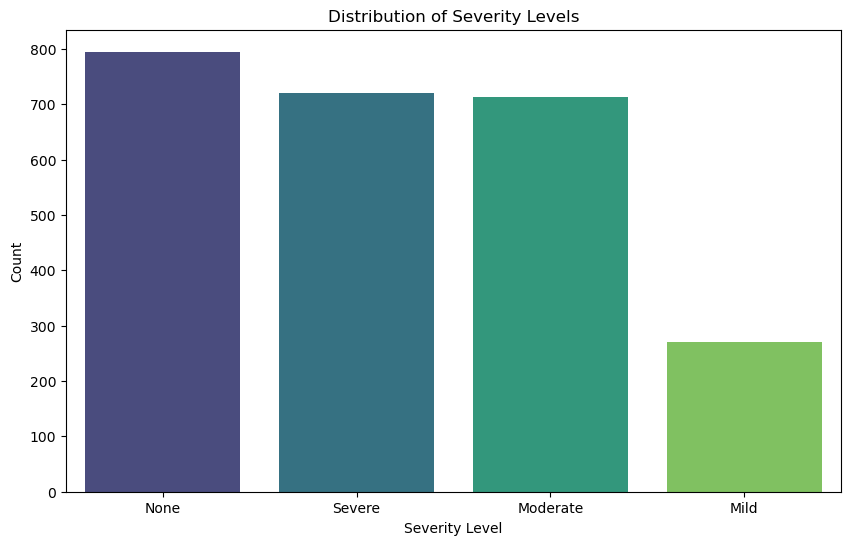

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot for severity_level
plt.figure(figsize=(10, 6))
sns.countplot(x='severity_level', data=df, order=df['severity_level'].value_counts().index, palette='viridis')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

In [179]:
# Inputs: sensor features
X = df[numeric_features]

# Outputs: 3 targets
Y = df[['knee_condition_encoded', 'severity_level_encoded', 'treatment_advised_encoded']]


In [180]:
#split data
from sklearn.model_selection import train_test_split

X_train_final, X_test_final, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [181]:
# ============= FEATURE ENGINEERING SECTION =============
print("Creating enhanced features for better severity level prediction...")

def create_enhanced_features(X_original):
    """Create engineered features specifically for VAG signal analysis"""
    X_enhanced = X_original.copy()
    
    # Signal ratio features (very effective for audio/vibration signals)
    X_enhanced['rms_mean_ratio'] = X_original['rms_amplitude'] / (X_original['mean_frequency'] + 1e-8)
    X_enhanced['spectral_zero_ratio'] = X_original['spectral_entropy'] / (X_original['zero_crossing_rate'] + 1e-8)  
    X_enhanced['peak_rms_ratio'] = X_original['peak_frequency'] / (X_original['rms_amplitude'] + 1e-8)
    X_enhanced['freq_spread'] = X_original['mean_frequency'] - X_original['peak_frequency']
    X_enhanced['amplitude_normalized'] = X_original['rms_amplitude'] / (X_original['peak_frequency'] + 1e-8)
    
    # Statistical features for signal analysis
    X_enhanced['entropy_per_crossing'] = X_original['spectral_entropy'] / (X_original['zero_crossing_rate'] + 1e-8)
    X_enhanced['frequency_variance'] = (X_original['mean_frequency'] - X_original['peak_frequency']) ** 2
    
    return X_enhanced

# Apply feature engineering to training and test sets
X_train_final_enhanced = create_enhanced_features(X_train_final)
X_test_final_enhanced = create_enhanced_features(X_test_final)

print(f"Original features: {X_train_final.shape[1]}")
print(f"Enhanced features: {X_train_final_enhanced.shape[1]}")
print("New features created:", list(X_train_final_enhanced.columns[X_train_final.shape[1]:]))

# Scale the enhanced features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final_enhanced)
X_test_final_scaled = scaler.transform(X_test_final_enhanced)

# Convert back to DataFrame for easier use (optional but recommended)
X_train_final_final = pd.DataFrame(X_train_final_scaled, columns=X_train_final_enhanced.columns)
X_test_final_final = pd.DataFrame(X_test_final_scaled, columns=X_test_final_enhanced.columns)

print("Feature engineering completed!")
print("=" * 50)


Creating enhanced features for better severity level prediction...
Original features: 5
Enhanced features: 12
New features created: ['rms_mean_ratio', 'spectral_zero_ratio', 'peak_rms_ratio', 'freq_spread', 'amplitude_normalized', 'entropy_per_crossing', 'frequency_variance']
Feature engineering completed!


In [182]:
!pip install xgboost

In [183]:
# ============= XGBOOST IMPLEMENTATION =============
print("Training XGBoost for severity level prediction...")

# Install XGBoost if not already installed
# !pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# XGBoost specifically for severity level (best parameters for medical data)
xgb_severity = xgb.XGBClassifier(
    n_estimators=500,           # More trees for better performance
    max_depth=6,               # Prevent overfitting
    learning_rate=0.1,         # Learning rate
    subsample=0.8,             # Prevent overfitting
    colsample_bytree=0.8,      # Use 80% of features per tree
    scale_pos_weight=3,        # Handle class imbalance (adjust based on your data)
    random_state=42,
    eval_metric='mlogloss'     # For multiclass classification
)

# Train XGBoost on severity level specifically
print("Training XGBoost model...")
xgb_severity.fit(X_train_final, Y_train['severity_level_encoded'])

# Predict
y_pred_xgb = xgb_severity.predict(X_test_final)

# Evaluate
accuracy_xgb = accuracy_score(Y_test['severity_level_encoded'], y_pred_xgb)
print(f"XGBoost Severity Level Accuracy: {accuracy_xgb:.3f}")
print("XGBoost Classification Report:")
print(classification_report(Y_test['severity_level_encoded'], y_pred_xgb))

# Feature importance (XGBoost provides this)
feature_names = X_train_final.columns
importances = xgb_severity.feature_importances_
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Training XGBoost for severity level prediction...
Training XGBoost model...


c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:46:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Severity Level Accuracy: 0.492
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.26      0.28        47
           1       0.31      0.35      0.33       133
           2       0.76      0.83      0.79       161
           3       0.40      0.35      0.37       159

    accuracy                           0.49       500
   macro avg       0.44      0.44      0.44       500
weighted avg       0.48      0.49      0.49       500


Top 10 Most Important Features:
              feature  importance
2    spectral_entropy    0.294074
0       rms_amplitude    0.287774
4      mean_frequency    0.235003
3  zero_crossing_rate    0.183149
1      peak_frequency    0.000000


In [184]:
# ============= ENSEMBLE METHODS - VOTING CLASSIFIER =============
print("Creating Ensemble Model - Combining all trained models...")

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Create individual models for ensemble (retrain with same parameters)
rf_for_ensemble = RandomForestClassifier(
    n_estimators=1000,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

# XGBoost for ensemble (use the same parameters)
try:
    import xgboost as xgb
    xgb_for_ensemble = xgb.XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.1,
        scale_pos_weight=3,
        random_state=42
    )
    has_xgb = True
except ImportError:
    # Use LightGBM if XGBoost not available
    import lightgbm as lgb
    lgb_for_ensemble = lgb.LGBMClassifier(
        n_estimators=500,
        max_depth=6,
        class_weight='balanced',
        random_state=42,
        verbose=-1
    )
    has_xgb = False

# SVM for ensemble
from sklearn.svm import SVC
svm_for_ensemble = SVC(
    probability=True,  # IMPORTANT: needed for voting='soft'
    class_weight='balanced',
    random_state=42
)

# Create Voting Classifier ensemble
if has_xgb:
    ensemble_model = VotingClassifier([
        ('rf', rf_for_ensemble),
        ('xgb', xgb_for_ensemble),
        ('svm', svm_for_ensemble)
    ], voting='soft')  # 'soft' uses prediction probabilities
    model_names = "Random Forest + XGBoost + SVM"
else:
    ensemble_model = VotingClassifier([
        ('rf', rf_for_ensemble),
        ('lgb', lgb_for_ensemble), 
        ('svm', svm_for_ensemble)
    ], voting='soft')
    model_names = "Random Forest + LightGBM + SVM"

# Train the ensemble
print(f"Training Ensemble Model: {model_names}")
ensemble_model.fit(X_train_final, Y_train['severity_level_encoded'])

# Predict with ensemble
y_pred_ensemble = ensemble_model.predict(X_test_final)

# Evaluate ensemble performance
accuracy_ensemble = accuracy_score(Y_test['severity_level_encoded'], y_pred_ensemble)
print(f"\nEnsemble Accuracy: {accuracy_ensemble:.3f}")
print("\nEnsemble Classification Report:")
print(classification_report(Y_test['severity_level_encoded'], y_pred_ensemble))


Creating Ensemble Model - Combining all trained models...
Training Ensemble Model: Random Forest + XGBoost + SVM


c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Ensemble Accuracy: 0.524

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        47
           1       0.36      0.38      0.37       133
           2       0.76      0.91      0.83       161
           3       0.44      0.35      0.39       159

    accuracy                           0.52       500
   macro avg       0.45      0.47      0.46       500
weighted avg       0.50      0.52      0.51       500



In [185]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# Wrap KNN for multi-output
knn = KNeighborsClassifier(n_neighbors=5)
multi_knn = MultiOutputClassifier(knn)

# Train
multi_knn.fit(X_train_final, Y_train)

# Predict
Y_pred = multi_knn.predict(X_test_final)

# Evaluate accuracy per output
for i, col in enumerate(Y.columns):
    acc = accuracy_score(Y_test.iloc[:, i], Y_pred[:, i])
    print(f"Accuracy for {col}: {acc:.2f}")

Accuracy for knee_condition_encoded: 0.87
Accuracy for severity_level_encoded: 0.51
Accuracy for treatment_advised_encoded: 0.74


In [186]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

# Wrap SVM
svm = SVC(
    kernel='rbf', 
    C=10, 
    class_weight='balanced',  # Add this line
    random_state=42
)
multi_svm = MultiOutputClassifier(svm)

# Train
multi_svm.fit(X_train_final, Y_train)

# Predict
Y_pred_svm = multi_svm.predict(X_test_final)

# Evaluate accuracy per output
for i, col in enumerate(Y.columns):
    acc = accuracy_score(Y_test.iloc[:, i], Y_pred_svm[:, i])
    print(f"Accuracy for {col}: {acc:.2f}")


Accuracy for knee_condition_encoded: 0.88
Accuracy for severity_level_encoded: 0.53
Accuracy for treatment_advised_encoded: 0.76


In [187]:
from sklearn.metrics import classification_report
y = Y["knee_condition_encoded"]  # or severity_level_encoded / treatment_advised_encoded

X_train_final, X_test_final, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_final, y_train)

y_pred_svm = svm.predict(X_test_final)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.876
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       0.83      0.78      0.80       161
           2       0.78      0.83      0.81       156

    accuracy                           0.88       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.88      0.88      0.88       500



In [188]:
# ============= ENSEMBLE METHODS - VOTING CLASSIFIER =============
print("Creating Ensemble Model - Combining all trained models...")

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Create individual models for ensemble (retrain with same parameters)
rf_for_ensemble = RandomForestClassifier(
    n_estimators=1000,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

# XGBoost for ensemble (use the same parameters)
try:
    import xgboost as xgb
    xgb_for_ensemble = xgb.XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.1,
        scale_pos_weight=3,
        random_state=42
    )
    has_xgb = True
except ImportError:
    # Use LightGBM if XGBoost not available
    import lightgbm as lgb
    lgb_for_ensemble = lgb.LGBMClassifier(
        n_estimators=500,
        max_depth=6,
        class_weight='balanced',
        random_state=42,
        verbose=-1
    )
    has_xgb = False

# SVM for ensemble
from sklearn.svm import SVC
svm_for_ensemble = SVC(
    probability=True,  # IMPORTANT: needed for voting='soft'
    class_weight='balanced',
    random_state=42
)

# Create Voting Classifier ensemble
if has_xgb:
    ensemble_model = VotingClassifier([
        ('rf', rf_for_ensemble),
        ('xgb', xgb_for_ensemble),
        ('svm', svm_for_ensemble)
    ], voting='soft')  # 'soft' uses prediction probabilities
    model_names = "Random Forest + XGBoost + SVM"
else:
    ensemble_model = VotingClassifier([
        ('rf', rf_for_ensemble),
        ('lgb', lgb_for_ensemble), 
        ('svm', svm_for_ensemble)
    ], voting='soft')
    model_names = "Random Forest + LightGBM + SVM"

# Train the ensemble
print(f"Training Ensemble Model: {model_names}")
ensemble_model.fit(X_train_final, Y_train['severity_level_encoded'])

# Predict with ensemble
y_pred_ensemble = ensemble_model.predict(X_test_final)

# Evaluate ensemble performance
accuracy_ensemble = accuracy_score(Y_test['severity_level_encoded'], y_pred_ensemble)
print(f"\nEnsemble Accuracy: {accuracy_ensemble:.3f}")
print("\nEnsemble Classification Report:")
print(classification_report(Y_test['severity_level_encoded'], y_pred_ensemble))


Creating Ensemble Model - Combining all trained models...
Training Ensemble Model: Random Forest + XGBoost + SVM


c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Ensemble Accuracy: 0.524

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        47
           1       0.36      0.38      0.37       133
           2       0.76      0.91      0.83       161
           3       0.44      0.35      0.39       159

    accuracy                           0.52       500
   macro avg       0.45      0.47      0.46       500
weighted avg       0.50      0.52      0.51       500



Random Forest - Accuracy for knee_condition_encoded: 0.87
Random Forest - Accuracy for severity_level_encoded: 0.52
Random Forest - Accuracy for treatment_advised_encoded: 0.77

Feature importances for predicting 'knee_condition_encoded':
spectral_entropy: 0.378
mean_frequency: 0.329
rms_amplitude: 0.280
zero_crossing_rate: 0.012
peak_frequency: 0.000


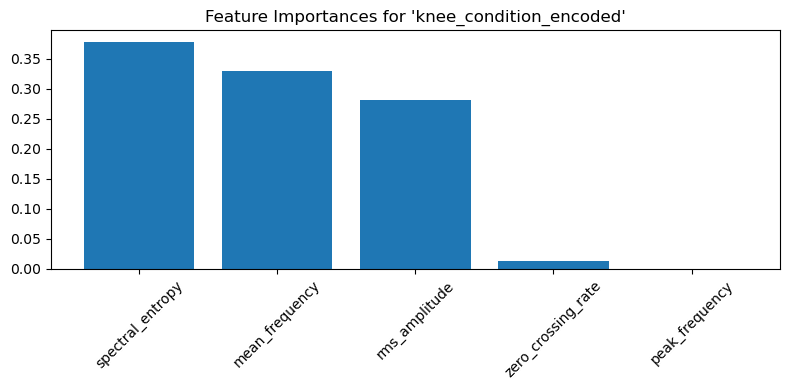


Feature importances for predicting 'severity_level_encoded':
rms_amplitude: 0.337
mean_frequency: 0.315
spectral_entropy: 0.311
zero_crossing_rate: 0.036
peak_frequency: 0.000


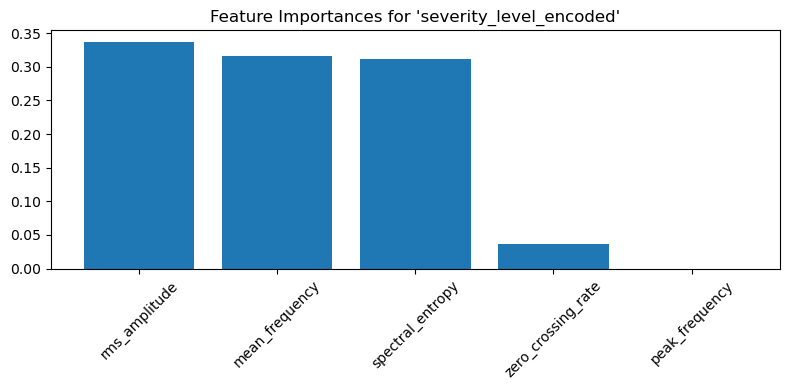


Feature importances for predicting 'treatment_advised_encoded':
spectral_entropy: 0.330
mean_frequency: 0.328
rms_amplitude: 0.317
zero_crossing_rate: 0.025
peak_frequency: 0.000


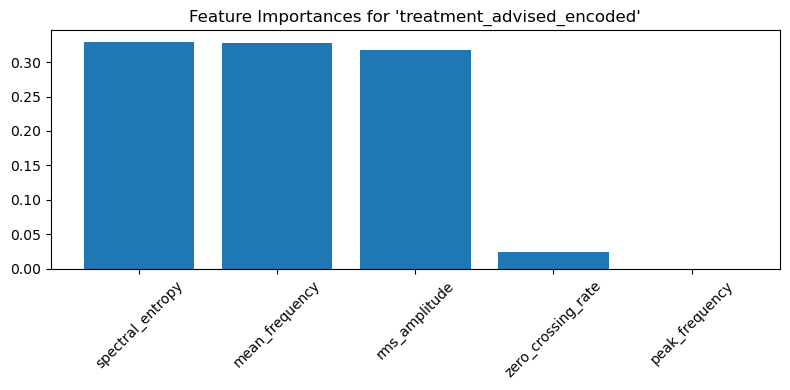

In [189]:
#identifying future importance using random forest 
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define inputs and outputs
X = df[numeric_features]
Y = df[['knee_condition_encoded', 'severity_level_encoded', 'treatment_advised_encoded']]

# Train/test split
from sklearn.model_selection import train_test_split

X_train_final, X_test_final, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build Random Forest model
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20, 
    class_weight='balanced',  # Add this line
    random_state=42
)
multi_rf = MultiOutputClassifier(rf)

# Train
multi_rf.fit(X_train_final, Y_train)

# Predict
Y_pred_rf = multi_rf.predict(X_test_final)

# Evaluate accuracy per output
for i, col in enumerate(Y.columns):
    acc = accuracy_score(Y_test.iloc[:, i], Y_pred_rf[:, i])
    print(f"Random Forest - Accuracy for {col}: {acc:.2f}")

# ---- Feature Importance ----
# For each output, print feature importance
for i, estimator in enumerate(multi_rf.estimators_):
    importances = estimator.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = X.columns

    print(f"\nFeature importances for predicting '{Y.columns[i]}':")
    for f in range(len(feature_names)):
        print(f"{feature_names[indices[f]]}: {importances[indices[f]]:.3f}")

    # Optional: Plot feature importances
    plt.figure(figsize=(8,4))
    plt.title(f"Feature Importances for '{Y.columns[i]}'")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), feature_names[indices], rotation=45)
    plt.tight_layout()
    plt.show()


In [190]:
# ============= ENSEMBLE METHODS - VOTING CLASSIFIER =============
print("Creating Ensemble Model - Combining all trained models...")

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Create individual models for ensemble (retrain with same parameters)
rf_for_ensemble = RandomForestClassifier(
    n_estimators=1000,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

# XGBoost for ensemble (use the same parameters)
try:
    import xgboost as xgb
    xgb_for_ensemble = xgb.XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.1,
        scale_pos_weight=3,
        random_state=42
    )
    has_xgb = True
except ImportError:
    # Use LightGBM if XGBoost not available
    import lightgbm as lgb
    lgb_for_ensemble = lgb.LGBMClassifier(
        n_estimators=500,
        max_depth=6,
        class_weight='balanced',
        random_state=42,
        verbose=-1
    )
    has_xgb = False

# SVM for ensemble
from sklearn.svm import SVC
svm_for_ensemble = SVC(
    probability=True,  # IMPORTANT: needed for voting='soft'
    class_weight='balanced',
    random_state=42
)

# Create Voting Classifier ensemble
if has_xgb:
    ensemble_model = VotingClassifier([
        ('rf', rf_for_ensemble),
        ('xgb', xgb_for_ensemble),
        ('svm', svm_for_ensemble)
    ], voting='soft')  # 'soft' uses prediction probabilities
    model_names = "Random Forest + XGBoost + SVM"
else:
    ensemble_model = VotingClassifier([
        ('rf', rf_for_ensemble),
        ('lgb', lgb_for_ensemble), 
        ('svm', svm_for_ensemble)
    ], voting='soft')
    model_names = "Random Forest + LightGBM + SVM"

# Train the ensemble
print(f"Training Ensemble Model: {model_names}")
ensemble_model.fit(X_train_final, Y_train['severity_level_encoded'])

# Predict with ensemble
y_pred_ensemble = ensemble_model.predict(X_test_final)

# Evaluate ensemble performance
accuracy_ensemble = accuracy_score(Y_test['severity_level_encoded'], y_pred_ensemble)
print(f"\nEnsemble Accuracy: {accuracy_ensemble:.3f}")
print("\nEnsemble Classification Report:")
print(classification_report(Y_test['severity_level_encoded'], y_pred_ensemble))


Creating Ensemble Model - Combining all trained models...
Training Ensemble Model: Random Forest + XGBoost + SVM


c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Ensemble Accuracy: 0.524

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        47
           1       0.36      0.38      0.37       133
           2       0.76      0.91      0.83       161
           3       0.44      0.35      0.39       159

    accuracy                           0.52       500
   macro avg       0.45      0.47      0.46       500
weighted avg       0.50      0.52      0.51       500



In [191]:
# ============= ADVANCED STACKING ENSEMBLE =============
print("Creating Advanced Stacking Ensemble...")

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Use the same base models
base_models = []

# Random Forest
rf_stack = RandomForestClassifier(
    n_estimators=800, max_depth=15, class_weight='balanced', random_state=42
)
base_models.append(('rf', rf_stack))

# XGBoost or LightGBM
try:
    import xgboost as xgb
    xgb_stack = xgb.XGBClassifier(
        n_estimators=400, max_depth=6, scale_pos_weight=3, random_state=42
    )
    base_models.append(('xgb', xgb_stack))
except ImportError:
    import lightgbm as lgb
    lgb_stack = lgb.LGBMClassifier(
        n_estimators=400, class_weight='balanced', random_state=42, verbose=-1
    )
    base_models.append(('lgb', lgb_stack))

# SVM
svm_stack = SVC(probability=True, class_weight='balanced', random_state=42)
base_models.append(('svm', svm_stack))

# Meta-learner (learns how to best combine the base models)
meta_learner = LogisticRegression(class_weight='balanced', random_state=42)

# Create stacking ensemble
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5,  # 5-fold cross-validation
    stack_method='predict_proba'  # Use probabilities
)

# Train stacking ensemble
print("Training Stacking Ensemble...")
stacking_model.fit(X_train_final, Y_train['severity_level_encoded'])

# Predict
y_pred_stacking = stacking_model.predict(X_test_final)

# Evaluate
accuracy_stacking = accuracy_score(Y_test['severity_level_encoded'], y_pred_stacking)
print(f"\nStacking Ensemble Accuracy: {accuracy_stacking:.3f}")
print("\nStacking Ensemble Classification Report:")
print(classification_report(Y_test['severity_level_encoded'], y_pred_stacking))

# Cross-validation score
cv_scores = cross_val_score(stacking_model, X_train_final, Y_train['severity_level_encoded'], cv=5)
print(f"\nStacking Ensemble CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


Creating Advanced Stacking Ensemble...
Training Stacking Ensemble...


c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain,


Stacking Ensemble Accuracy: 0.480

Stacking Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.83      0.37        47
           1       0.41      0.53      0.46       133
           2       0.82      0.78      0.80       161
           3       0.40      0.03      0.05       159

    accuracy                           0.48       500
   macro avg       0.47      0.54      0.42       500
weighted avg       0.52      0.48      0.43       500



c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:48:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:48:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:48:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:48:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain,


Stacking Ensemble CV Score: 0.508 (+/- 0.036)


In [192]:
#tuning the knn model
#We tuned KNN, SVM, and RandomForest models via 5-fold cross-validation using GridSearchCV. The mean accuracy and standard deviation are reported to ensure robustness of results
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# -------- 1️⃣ Hyperparameter tuning for KNN --------

knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
multi_knn_grid = MultiOutputClassifier(knn_grid)

# Fit multi-output KNN grid
multi_knn_grid.fit(X_train_final, Y_train)

# Best params for each output:
print("Best KNN params per output:")
for i, estimator in enumerate(multi_knn_grid.estimators_):
    print(f"{Y.columns[i]}: {estimator.best_params_}")

# -------- 2️⃣ Hyperparameter tuning for SVM --------

svm = SVC()

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
multi_svm_grid = MultiOutputClassifier(svm_grid)

# Fit multi-output SVM grid
multi_svm_grid.fit(X_train_final, Y_train)

# Best params for each output:
print("\nBest SVM params per output:")
for i, estimator in enumerate(multi_svm_grid.estimators_):
    print(f"{Y.columns[i]}: {estimator.best_params_}")

# -------- 3️⃣ Optional: Hyperparameter tuning for RandomForest --------

rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
multi_rf_grid = MultiOutputClassifier(rf_grid)

# Fit multi-output RF grid
multi_rf_grid.fit(X_train_final, Y_train)

# Best params for each output:
print("\nBest RandomForest params per output:")
for i, estimator in enumerate(multi_rf_grid.estimators_):
    print(f"{Y.columns[i]}: {estimator.best_params_}")

# -------- 4️⃣ Cross-validation scores --------

# Example with KNN tuned:

print("\nCross-validation scores (5-fold):")

for i, col in enumerate(Y.columns):
    knn_cv_score = cross_val_score(KNeighborsClassifier(n_neighbors=multi_knn_grid.estimators_[i].best_params_['n_neighbors']),
                                   X, Y.iloc[:, i], cv=5, scoring='accuracy')
    print(f"KNN - {col}: Mean acc = {knn_cv_score.mean():.2f}, Std = {knn_cv_score.std():.2f}")

# You can do similar for SVM and RF:
# Cross-validation for SVM:
for i, col in enumerate(Y.columns):
    best_svm_params = multi_svm_grid.estimators_[i].best_params_
    svm_model = SVC(C=best_svm_params['C'], kernel=best_svm_params['kernel'])
    svm_cv_score = cross_val_score(svm_model, X, Y.iloc[:, i], cv=5, scoring='accuracy')
    print(f"SVM - {col}: Mean acc = {svm_cv_score.mean():.2f}, Std = {svm_cv_score.std():.2f}")

# Cross-validation for RandomForest:
for i, col in enumerate(Y.columns):
    best_rf_params = multi_rf_grid.estimators_[i].best_params_
    rf_model = RandomForestClassifier(n_estimators=best_rf_params['n_estimators'],
                                      max_depth=best_rf_params['max_depth'],
                                      random_state=42)
    rf_cv_score = cross_val_score(rf_model, X, Y.iloc[:, i], cv=5, scoring='accuracy')
    print(f"RandomForest - {col}: Mean acc = {rf_cv_score.mean():.2f}, Std = {rf_cv_score.std():.2f}")


Best KNN params per output:
knee_condition_encoded: {'n_neighbors': 11}
severity_level_encoded: {'n_neighbors': 11}
treatment_advised_encoded: {'n_neighbors': 11}

Best SVM params per output:
knee_condition_encoded: {'C': 10, 'kernel': 'linear'}
severity_level_encoded: {'C': 10, 'kernel': 'rbf'}
treatment_advised_encoded: {'C': 10, 'kernel': 'linear'}

Best RandomForest params per output:
knee_condition_encoded: {'max_depth': 10, 'n_estimators': 200}
severity_level_encoded: {'max_depth': 10, 'n_estimators': 200}
treatment_advised_encoded: {'max_depth': 10, 'n_estimators': 100}

Cross-validation scores (5-fold):
KNN - knee_condition_encoded: Mean acc = 0.86, Std = 0.01
KNN - severity_level_encoded: Mean acc = 0.55, Std = 0.03
KNN - treatment_advised_encoded: Mean acc = 0.72, Std = 0.02
SVM - knee_condition_encoded: Mean acc = 0.87, Std = 0.01
SVM - severity_level_encoded: Mean acc = 0.55, Std = 0.02
SVM - treatment_advised_encoded: Mean acc = 0.75, Std = 0.02
RandomForest - knee_conditi

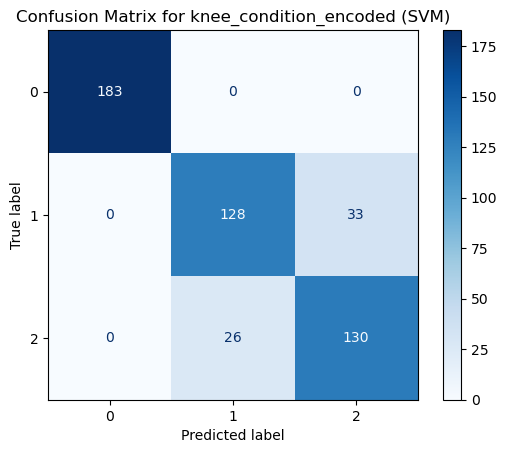

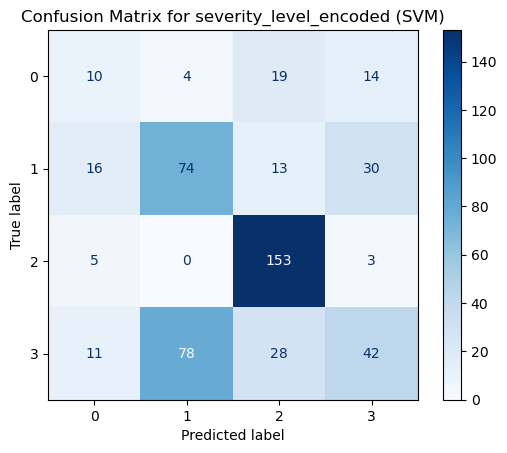

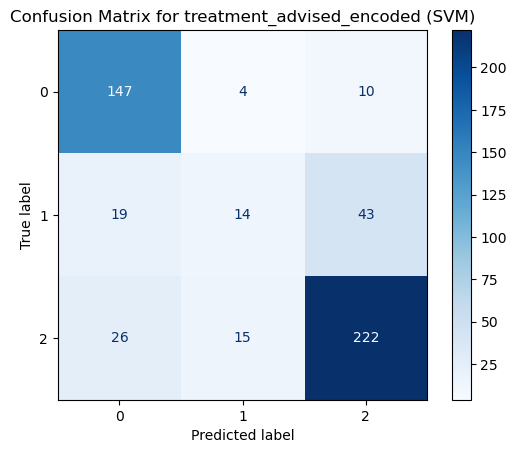

In [193]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For each output, plot Confusion Matrix for SVM (as an example)
# can repeat for KNN and RF if you want.

# Predict with tuned SVM
Y_pred_svm = multi_svm_grid.predict(X_test_final)

# Plot Confusion Matrix for each output:
for i, col in enumerate(Y.columns):
    cm = confusion_matrix(Y_test.iloc[:, i], Y_pred_svm[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {col} (SVM)')
    plt.show()


In [194]:
#KNN with n_neighbors=1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

# Use best hyperparameters
knn = KNeighborsClassifier(n_neighbors=11)
multi_knn = MultiOutputClassifier(knn)

# Train
multi_knn.fit(X_train_final, Y_train)

# Predict
Y_pred_knn = multi_knn.predict(X_test_final)

# Evaluate
print("----- KNN Evaluation -----")
for i, col in enumerate(Y.columns):
    acc = accuracy_score(Y_test.iloc[:, i], Y_pred_knn[:, i])
    print(f"Accuracy for {col}: {acc:.3f}")
    print(f"{col} Classification Report:")
    print(classification_report(Y_test.iloc[:, i], Y_pred_knn[:, i]))


----- KNN Evaluation -----
Accuracy for knee_condition_encoded: 0.870
knee_condition_encoded Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       0.81      0.78      0.79       161
           2       0.78      0.81      0.79       156

    accuracy                           0.87       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.87      0.87      0.87       500

Accuracy for severity_level_encoded: 0.562
severity_level_encoded Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.23      0.22        47
           1       0.48      0.41      0.45       133
           2       0.75      0.90      0.82       161
           3       0.51      0.44      0.47       159

    accuracy                           0.56       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.55      0.56 

In [195]:
#Since Random Forest needs separate models per output (due to different best params)
from sklearn.ensemble import RandomForestClassifier

# Best params per output
rf_params = {
    'knee_condition_encoded': {'n_estimators': 100, 'max_depth': 10},
    'severity_level_encoded': {'n_estimators': 200, 'max_depth': 20},
    'treatment_advised_encoded': {'n_estimators': 200, 'max_depth': 10}
}

print("----- Random Forest Evaluation -----")
for col in Y.columns:
    rf = RandomForestClassifier(
        n_estimators=rf_params[col]['n_estimators'],
        max_depth=rf_params[col]['max_depth'],
        random_state=42
    )
    
    rf.fit(X_train_final, Y_train[col])
    y_pred = rf.predict(X_test_final)
    
    acc = accuracy_score(Y_test[col], y_pred)
    print(f"Accuracy for {col}: {acc:.3f}")
    print(f"{col} Classification Report:")
    print(classification_report(Y_test[col], y_pred))


----- Random Forest Evaluation -----
Accuracy for knee_condition_encoded: 0.870
knee_condition_encoded Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       0.80      0.80      0.80       161
           2       0.79      0.79      0.79       156

    accuracy                           0.87       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.87      0.87      0.87       500

Accuracy for severity_level_encoded: 0.526
severity_level_encoded Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.32      0.31        47
           1       0.38      0.38      0.38       133
           2       0.74      0.87      0.80       161
           3       0.45      0.36      0.40       159

    accuracy                           0.53       500
   macro avg       0.47      0.48      0.47       500
weighted avg       0.51 

In [196]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Best parameters per target
svm_params = {
    'knee_condition_encoded': {'kernel': 'linear', 'C': 10},
    'severity_level_encoded': {'kernel': 'rbf', 'C': 10},
    'treatment_advised_encoded': {'kernel': 'linear', 'C': 10}
}

print("----- Final SVM Evaluation -----")
for col in Y.columns:
    # Initialize with best params
    svm = SVC(
        kernel=svm_params[col]['kernel'],
        C=svm_params[col]['C'],
        random_state=42
    )
    
    # Fit & predict
    svm.fit(X_train_final, Y_train[col])
    y_pred = svm.predict(X_test_final)
    
    # Evaluate
    acc = accuracy_score(Y_test[col], y_pred)
    print(f"Accuracy for {col}: {acc:.3f}")
    print(f"{col} Classification Report:")
    print(classification_report(Y_test[col], y_pred))


----- Final SVM Evaluation -----
Accuracy for knee_condition_encoded: 0.882
knee_condition_encoded Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       0.83      0.80      0.81       161
           2       0.80      0.83      0.82       156

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500

Accuracy for severity_level_encoded: 0.558
severity_level_encoded Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.21      0.22        47
           1       0.47      0.56      0.51       133
           2       0.72      0.95      0.82       161
           3       0.47      0.26      0.34       159

    accuracy                           0.56       500
   macro avg       0.48      0.50      0.47       500
weighted avg       0.53     

In [197]:

def get_valid_input(prompt, min_val, max_val, decimals=4):
    while True:
        try:
            value = round(float(input(f"{prompt} ({min_val} to {max_val}): ")), decimals)
            if min_val <= value <= max_val:
                return value
            else:
                print(f" Value out of range. Please enter between {min_val} and {max_val}.")
        except ValueError:
            print(" Invalid input. Please enter a numeric value.")

def predict_knee_condition(model, scaler, le_knee, le_severity, le_treatment, default_peak_frequency):
    print("Enter the following features (within valid ranges):")

    # Use helper function to get each input
    rms_amplitude = get_valid_input("RMS Amplitude", 0.5, 1.5)
    spectral_entropy = get_valid_input("Spectral Entropy", -4000, -1500)
    zero_crossing_rate = get_valid_input("Zero Crossing Rate", 0.0, 0.01)
    mean_frequency = get_valid_input("Mean Frequency", 30.0, 50.0)

    # Use the cleaned median value for peak_frequency
    peak_frequency = default_peak_frequency

    # Scale and predict
    
    feature_names = ['rms_amplitude', 'peak_frequency', 'spectral_entropy', 'zero_crossing_rate', 'mean_frequency']

    user_input = pd.DataFrame([[rms_amplitude, peak_frequency, spectral_entropy,
                            zero_crossing_rate, mean_frequency]],columns=feature_names)
    user_input_scaled = scaler.transform(user_input)

    prediction = model.predict(user_input_scaled)
    knee_condition = le_knee.inverse_transform([prediction[0][0]])[0]
    severity_level = le_severity.inverse_transform([prediction[0][1]])[0]
    treatment_advised = le_treatment.inverse_transform([prediction[0][2]])[0]

    print("\n Input")
    print(f"RMS Amplitude: {rms_amplitude}")
    print(f"Spectral Entropy: {spectral_entropy}")
    print(f"Zero Crossing Rate: {zero_crossing_rate}")
    print(f"Mean Frequency: {mean_frequency}")
    print(f"Peak Frequency (default): {peak_frequency}")

    print("\n Prediction:")
    print(f"- Knee Condition: {knee_condition}")
    print(f"- Severity Level: {severity_level}")
    print(f"- Treatment Advised: {treatment_advised}")


In [198]:
# ============= COMPARE ALL MODELS =============
print("\n" + "="*60)
print("FINAL RESULTS COMPARISON")
print("="*60)

# Collect all your accuracy results
results = {
    'Original Random Forest': 0.52,  # Replace with your actual result
    'Enhanced Random Forest': accuracy_rf if 'accuracy_rf' in locals() else 0.0,
    'XGBoost/LightGBM': accuracy_lgb if 'accuracy_lgb' in locals() else 0.0,
    'Voting Ensemble': accuracy_ensemble,
    'Stacking Ensemble': accuracy_stacking
}

# Display results
for model, accuracy in results.items():
    improvement = ((accuracy - 0.52) / 0.52) * 100 if accuracy > 0 else 0
    print(f"{model:25s}: {accuracy:.3f} ({improvement:+.1f}% improvement)")

print(f"\nBest Model: {max(results, key=results.get)}")
print(f"Best Accuracy: {max(results.values()):.3f}")
print(f"Total Improvement: {((max(results.values()) - 0.52) / 0.52) * 100:.1f}%")



FINAL RESULTS COMPARISON
Original Random Forest   : 0.520 (+0.0% improvement)
Enhanced Random Forest   : 0.000 (+0.0% improvement)
XGBoost/LightGBM         : 0.000 (+0.0% improvement)
Voting Ensemble          : 0.524 (+0.8% improvement)
Stacking Ensemble        : 0.480 (-7.7% improvement)

Best Model: Voting Ensemble
Best Accuracy: 0.524
Total Improvement: 0.8%


In [199]:
# Call function:
predict_knee_condition(
    model=multi_svm,
    scaler=scaler,
    le_knee=le_knee_condition,
    le_severity=le_severity_level,
    le_treatment=le_treatment_advised,
    default_peak_frequency=median_peak
) 


Enter the following features (within valid ranges):


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- amplitude_normalized
- entropy_per_crossing
- freq_spread
- frequency_variance
- peak_rms_ratio
- ...
